In [1031]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from imageio import imread
import math
import timeit

## Wczytywanko obrazka

In [954]:

from imageio.core import urlopen
x = urlopen('https://www.everydogsday.net/wp-content/uploads/2017/12/image-dog-square-2.jpg').read()
im = imread(x,'jpg')
image = im/255

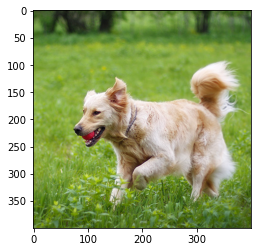

In [955]:
plt.imshow(image)

In [601]:

def to_grey(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

grey = to_grey(im)

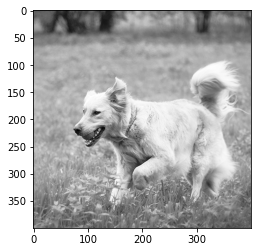

In [607]:
plt.imshow(grey,cmap='Greys_r')

## Kernele

In [652]:

edge = np.array([[-1.,-1.,-1.],
                                [-1.,8.,-1.],
                                [-1.,-1.,-1.]]).reshape(3,3,1)

sharpen = np.array([[0.,-1.,0.],
                           [-1.,5.,-1.],
                           [0.,-1.,0.]]).reshape(3,3,1)


blur = np.array([[1.,2.,1.],
                        [2.,4.,2.],
                        [1.,2.,1.]])
blur = (blur/16).reshape(3,3,1)
kernels = [edge,sharpen,blur]

## Wersja z pętlami

In [1032]:
def conv2d(image,kernels,stride=1,pad=1):
    output = []
    for kernel in kernels:
        height, width, chanels = image.shape
        k, stride = kernel.shape[0], stride
        new_h = (height - k + 2 )//stride + 1
        new_w = (width - k + 2 )//stride + 1
        out = np.zeros(shape=(new_h, new_w, c))
        image = np.pad(image, [(pad, pad),(pad, pad),(0,0)], 'constant',  constant_values = 0)
        for i in range(0, new_h):
            for j in range(0, new_w):
                temp = image[stride*i:(k +stride*i),stride*j:(k+stride*j),:]
                out[i,j] = np.sum(np.multiply(temp, kernel))
        output.append(out)
        
    return output

In [1033]:
%%time
img = conv2d(image,kernels)

CPU times: user 6.41 s, sys: 2.54 ms, total: 6.42 s
Wall time: 6.42 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


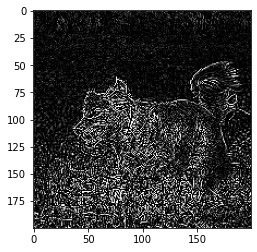

In [1030]:
plt.imshow((img[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


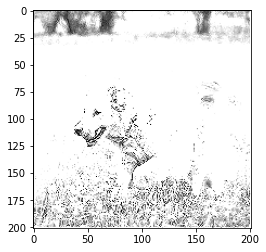

In [1027]:
plt.imshow(img[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


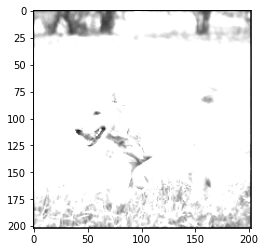

In [1028]:
plt.imshow(img[2])

## Macierzowo

In [1034]:
def im2col(image, f, stride=1):
    size = f.shape[0]
    m,n = image.shape
    s0, s1 = image.strides    
    nrows = m-size+1
    ncols = n-size+1
    shp =size,size,nrows,ncols
    strd = s0,s1,s0,s1
    
    out_view = np.lib.stride_tricks.as_strided(image, shape=shp, strides=strd)
    return out_view.reshape(size*size,-1)[:,::stride]
def conv_matr(image,kernels,stride=1):
    output = []
    for kernel in kernels:
        output_shape = (image.shape[0] - kernel.shape[0]) + 1
        matr = im2col(image,kernel)
        matr = np.dot(kernel.flatten(), matr) 
        fin = matr.reshape(output_shape,output_shape)
        output.append(fin)
    return output




In [1035]:
%%time
img = conv_matr(grey,kernels)

CPU times: user 67.1 ms, sys: 12.1 ms, total: 79.2 ms
Wall time: 30.5 ms


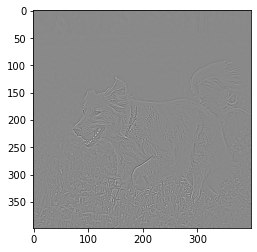

In [965]:
plt.imshow(img[0],cmap='Greys_r')

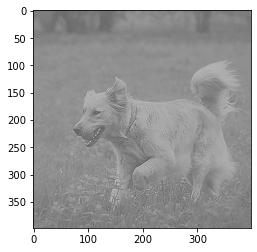

In [966]:
plt.imshow(img[1],cmap='Greys_r')

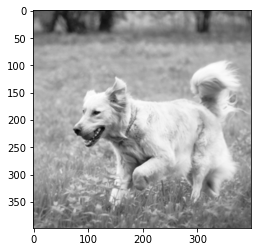

In [967]:
plt.imshow(img[2],cmap='Greys_r')

# Wnioski

Obie funkcje działają poprawnie, odpowiedinio przekształcając obrazki. Różnica w czasie działania jest gigantyczna, bo wersja macierzowa działa mniej więcej 200 razy szybciej, a dodatkowo wersja macierzowa ma dużo prostszy kod do zrozumienia.